In [9]:
%matplotlib inline
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [10]:
data_source = 'State_to_State_Migration_2011_2016.csv'
pop_change_df = pd.read_csv(data_source)
pop_change_df = pop_change_df[pop_change_df.Year != 2011.0]
pop_change_df['Year'] = pop_change_df['Year'].dropna()
pop_change_df.reset_index(inplace = True)
pop_change_df.head()



,index,Year,Location,Population 1 year and over,Unnamed: 3,Percent_Change,Unnamed: 5,Same house 1 year ago,Unnamed: 7,Same state of residence 1 year ago,...,Unnamed: 123,Current residence in --.10,Abroad 1 year ago--,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132
0,5,2012,United States,"310,212,755","2,312,436",0.75%,"+/- 25,814","263,612,596","+/- 229,733","37,696,597",...,"+/- 5,150",United States1,"1,833,217","+/- 32,633","74,500","+/- 8,156","15,876","+/- 3,083","1,742,841","+/- 31,206"
1,6,2012,Arizona,"6,468,907","66,606",1.04%,"+/- 3,874","5,242,674","+/- 32,185","953,789",...,"+/- 1,401",Arizona,"39,987","+/- 4,295","1,791","+/- 1,662",447,+/- 401,"37,749","+/- 4,037"
2,7,2012,Colorado,"5,123,944","75,501",1.50%,"+/- 2,939","4,131,357","+/- 21,752","751,921",...,"+/- 2,808",Colorado,"35,606","+/- 4,299","1,144",+/- 903,387,+/- 327,"34,075","+/- 4,250"
3,8,2012,Florida,"19,114,620","250,672",1.33%,"+/- 6,877","16,032,617","+/- 49,245","2,380,288",...,+/- 567,Florida,"164,567","+/- 10,910","21,638","+/- 4,641","2,328","+/- 1,213","140,601","+/- 9,386"
4,9,2012,Washington,"6,815,763","67,289",1.00%,"+/- 3,864","5,648,199","+/- 25,225","904,695",...,+/- 495,Washington,"47,375","+/- 5,674","1,025",+/- 878,"1,044",+/- 528,"45,306","+/- 5,353"


In [23]:
new_pop_df = pd.DataFrame(pop_change_df[['Year','Location','Percent_Change']])
new_pop_df['Percent_Change'] = new_pop_df['Percent_Change'].str.replace('%',"")
new_pop_df['Year'] = new_pop_df['Year'].astype(int)
new_pop_df['Percent_Change'] = new_pop_df['Percent_Change'].astype(float)
new_pop_df.head()

,Year,Location,Percent_Change
0,2012,United States,0.75
1,2012,Arizona,1.04
2,2012,Colorado,1.50
3,2012,Florida,1.33
4,2012,Washington,1.00


In [38]:
arizona_df = new_pop_df[new_pop_df["Location"] == "Arizona"]
unitedstates_df = new_pop_df[new_pop_df["Location"] == "United States"]
colorado_df = new_pop_df[new_pop_df["Location"] == "Colorado"]
florida_df = new_pop_df[new_pop_df["Location"] == "Florida"]
washington_df = new_pop_df[new_pop_df["Location"] == "Washington"]

In [40]:
arizona_df.head()

,Year,Location,Percent_Change
1,2012,Arizona,1.04
6,2013,Arizona,1.15
11,2014,Arizona,1.66
16,2015,Arizona,1.44
21,2016,Arizona,1.54


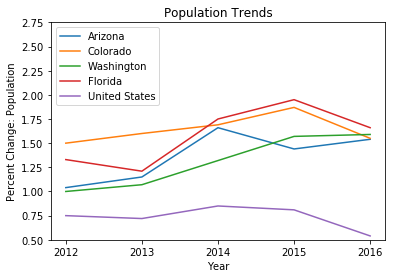

In [51]:
years = ["2012", "2013", "2014", "2015", "2016"]
plt.plot(years, arizona_df.Percent_Change, label='Arizona' )
plt.plot(years, colorado_df.Percent_Change, label='Colorado')
plt.plot(years, washington_df.Percent_Change, label='Washington')
plt.plot(years, florida_df.Percent_Change, label="Florida")
plt.plot(years, unitedstates_df.Percent_Change, label='United States')
plt.ylabel('Percent Change: Population')
plt.xlabel('Year')
plt.ylim(.5,2.75)
plt.title('Population Trends')
plt.legend()
plt.savefig('Population_Trends.png')